<a href="https://colab.research.google.com/github/kailashnirola/python_notebooks/blob/main/AlexNet_for_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, stratify=train_labels)

def preprocess(X,y):
  X = X.reshape((-1, 28, 28, 1))/255.0
  y = to_categorical(y)
  return X,y

train_images, train_labels = preprocess(train_images, train_labels)
val_images, val_labels = preprocess(val_images, val_labels)
test_images, test_labels = preprocess(test_images, test_labels)

In [ ]:
model = Sequential([
    Input((28,28,1)),
    Conv2D(96,(11,11),activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(256,(5,5), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(384, (3,3), activation='relu', padding='same'),
    Conv2D(384, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(train_images, train_labels, batch_size=1024, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.3234 - loss: 1.8532 - val_accuracy: 0.9465 - val_loss: 0.1756
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 72s 326ms/step - accuracy: 0.9594 - loss: 0.1308 - val_accuracy: 0.9800 - val_loss: 0.0709
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step - accuracy: 0.9815 - loss: 0.0587 - val_accuracy: 0.9835 - val_loss: 0.0540
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 328ms/step - accuracy: 0.9887 - loss: 0.0361 - val_accuracy: 0.9892 - val_loss: 0.0370
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - accuracy: 0.9926 - loss: 0.0233 - val_accuracy: 0.9877 - val_loss: 0.0448
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 324ms/step - accuracy: 0.9939 - loss: 0.0180 - val_accuracy: 0.9880 - val_loss: 0.0399
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step - accuracy: 0.9939 - loss: 0.0195 - val_accuracy: 0.9907 - val_loss: 0.0350
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 338ms/step - accuracy: 0.9964 - loss: 0.0122 - val_accurac

In [ ]:
loss,acc=model.evaluate(test_images,test_labels)
print(f"Test accuracy: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9893 - loss: 0.0379
Test accuracy: 0.9913


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


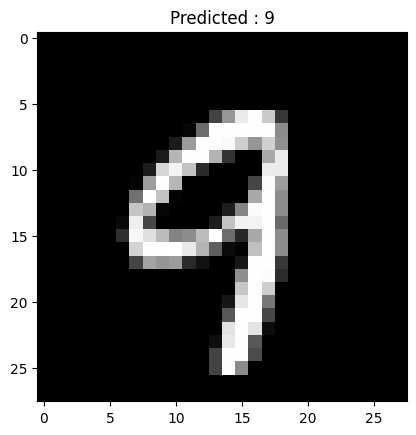

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
pred = model.predict(test_images)
r_idx = np.random.randint(0,test_images.shape[0])
plt.imshow(test_images[r_idx], cmap='gray')
plt.title(f'Predicted : {np.argmax(pred[r_idx])}')
plt.show()

In [ ]:
model.save('alexnet_for_mnist.keras')

In [ ]:
l_model = tf.keras.models.load_model('alexnet_for_mnist.keras')
l_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)                   │ (None, 28, 28, 96)          │          11,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 14, 14, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 7, 7, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 7, 7, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 4096)                │       9,441,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,962,592 (343.18 MB)

 Trainable params: 29,987,530 (114.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 59,975,062 (228.79 MB)